# Caso de Prueba 02: Uso de PCA para la detección de anomalías y detectar clientes con riesgo de lavado de dinero

In [71]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("AumentadaPFLD.csv")
df

,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,SubproductR,...,SumReR,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR
0,80,100,96,100,100,97,96,72,98,77,...,64,66,72,80,78,91,79,97,89,99
1,96,96,97,98,99,96,96,69,97,77,...,83,84,71,81,78,92,81,99,90,100
2,81,98,99,99,99,98,97,68,96,98,...,84,64,89,82,82,90,82,99,92,96
3,96,99,99,100,96,99,99,68,98,99,...,84,84,88,81,80,91,82,96,89,96
4,82,99,98,98,97,100,97,68,100,96,...,66,84,68,80,82,89,82,97,89,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27746,19,12,32,19,27,19,11,11,26,8,...,25,23,29,4,6,19,19,17,4,10
27747,20,9,32,18,25,19,10,10,27,12,...,26,27,12,21,20,18,22,16,5,9
27748,22,10,34,21,26,19,8,10,26,3,...,24,5,28,18,6,29,20,15,7,8
27749,20,12,33,20,24,22,9,11,23,6,...,24,27,12,20,18,28,9,14,5,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27751 entries, 0 to 27750
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SegmentR       27751 non-null  int64
 1   PEPR           27751 non-null  int64
 2   AgeR           27751 non-null  int64
 3   TimeRelationR  27751 non-null  int64
 4   IncomeSourceR  27751 non-null  int64
 5   ActivityR      27751 non-null  int64
 6   NationalityR   27751 non-null  int64
 7   CommonAddR     27751 non-null  int64
 8   ProductTR      27751 non-null  int64
 9   SubproductR    27751 non-null  int64
 10  OperationTR    27751 non-null  int64
 11  MonetaryInstR  27751 non-null  int64
 12  DivisaR        27751 non-null  int64
 13  ChannelR       27751 non-null  int64
 14  OperabilitySR  27751 non-null  int64
 15  OGoverR        27751 non-null  int64
 16  SARR           27751 non-null  int64
 17  VMR            27751 non-null  int64
 18  VOR            27751 non-null  int64
 19  SumS

In [4]:
df.mean(axis=0)

SegmentR         41.845231
PEPR             27.030161
AgeR             49.882491
TimeRelationR    45.685813
IncomeSourceR    38.271954
ActivityR        41.231055
NationalityR     35.566178
CommonAddR       32.469461
ProductTR        36.923030
SubproductR      26.354005
OperationTR      22.063205
MonetaryInstR    42.809773
DivisaR          40.872833
ChannelR         40.676156
OperabilitySR    35.877446
OGoverR          21.595582
SARR             29.555367
VMR              44.422760
VOR              46.959137
SumSeR           30.485748
SumReR           31.288638
RSR              33.070988
AAR              38.315628
SendingNumR      34.575547
ReceivingNumR    32.229721
StateOpeR        41.764297
StateResR        34.753811
MunOpeR          48.280314
MunResR          40.920291
CountryR         24.318943
dtype: float64

In [5]:
df.var(axis=0)

SegmentR          635.681883
PEPR             1210.789397
AgeR              499.348678
TimeRelationR    1346.474004
IncomeSourceR     450.752813
ActivityR         708.787909
NationalityR     1598.024224
CommonAddR        845.451887
ProductTR         389.462039
SubproductR       636.595396
OperationTR       705.178347
MonetaryInstR     719.249470
DivisaR           638.583864
ChannelR          542.256959
OperabilitySR     873.283106
OGoverR           562.982422
SARR              524.551376
VMR               395.859034
VOR               412.707663
SumSeR            446.251752
SumReR            479.788613
RSR               397.804042
AAR               444.785528
SendingNumR       612.260806
ReceivingNumR     549.261857
StateOpeR         509.355793
StateResR         557.080001
MunOpeR          1324.321313
MunResR          1367.293682
CountryR         1057.971028
dtype: float64

In [7]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

modelo_pca = pca_pipe.named_steps['pca']

In [15]:
df_pca = pca_pipe.transform(df)

In [16]:
df_pca

array([[ 1.06225761e+01,  1.27757664e+00, -2.51837336e-01, ...,
        -7.49121181e-02,  1.33849094e-01, -1.00058413e-02],
       [ 1.13396263e+01,  1.13946916e+00, -3.26066936e-01, ...,
         6.70854143e-02, -1.32540276e-01, -6.67159895e-02],
       [ 1.16929523e+01,  1.05416523e+00, -2.62659150e-01, ...,
         1.60327843e-01, -6.54615707e-02, -1.07991370e-01],
       ...,
       [-4.08219024e+00,  4.45055292e-01,  3.65932846e-01, ...,
        -4.05144704e-02, -8.22794761e-02, -4.29310656e-02],
       [-4.14664649e+00,  4.53731289e-01,  4.80985951e-02, ...,
        -4.42615955e-02,  6.07651700e-02, -9.95840016e-03],
       [-4.36774043e+00,  5.17735928e-01,  1.11549670e-01, ...,
         8.28417775e-02, -3.46658807e-02, -8.48834038e-02]])

In [10]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
               'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20',
               'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30']
)

,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,SubproductR,...,SumReR,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR
PC1,0.186933,0.160212,0.196936,0.175248,0.182330,0.200408,0.171422,0.175455,0.185224,0.182058,...,0.185636,0.176200,0.181605,0.178964,0.179054,0.185018,0.191902,0.183645,0.187881,0.155945
PC2,0.061823,0.420457,0.074732,0.109607,0.202696,0.012216,0.167260,-0.148458,0.122371,0.023839,...,-0.055494,-0.146776,-0.125581,-0.183216,-0.219970,-0.119413,-0.071826,-0.286797,-0.222251,0.421736
PC3,-0.218032,-0.044936,0.081231,0.367665,0.033446,0.039062,0.336635,0.401367,0.144542,-0.188294,...,0.055578,-0.208809,-0.185800,-0.158050,-0.045268,0.169602,-0.107420,0.047349,-0.082199,-0.176286
PC4,-0.206472,-0.255503,0.163928,-0.111040,0.389342,0.135162,-0.213653,-0.136862,0.272408,0.313469,...,-0.069629,0.006683,-0.152190,-0.210070,-0.048970,0.049440,0.049798,-0.185357,-0.155741,-0.109577
PC5,-0.054571,0.040224,-0.186488,-0.188272,-0.013904,-0.181320,-0.055557,-0.012913,0.352272,-0.201388,...,-0.001296,0.272311,0.202798,0.255443,0.124379,0.152761,-0.272092,-0.107608,-0.226997,0.026045
PC6,-0.095537,0.113989,0.040055,-0.350176,-0.203116,0.148840,-0.301106,-0.002600,-0.072875,-0.116009,...,0.331442,-0.279511,-0.050264,-0.066953,-0.102484,0.301715,0.017835,0.028449,-0.138531,0.161880
PC7,-0.200588,0.255070,-0.187755,-0.128698,-0.008402,-0.139330,-0.047766,-0.075814,0.023029,0.250051,...,-0.095289,-0.070395,-0.345647,-0.223701,0.498292,-0.048691,0.078380,0.223886,0.133448,-0.013068
PC8,0.287207,-0.050098,0.050593,-0.177883,0.066995,-0.023602,-0.411954,0.175235,-0.067726,-0.053236,...,0.098792,-0.122961,-0.058382,-0.043303,0.158105,-0.092805,-0.046796,0.016676,0.050938,0.235401
PC9,0.200332,0.038311,0.046170,0.041031,0.087388,0.041515,-0.076641,0.131646,-0.062447,0.067066,...,-0.258354,0.468923,-0.223728,-0.051267,-0.096160,0.064074,-0.168989,-0.031881,-0.014754,0.056203
PC10,0.018390,-0.132116,-0.209864,0.102364,0.021243,-0.122311,0.214080,-0.261479,0.107012,0.132496,...,0.706631,-0.003029,0.087410,-0.059218,0.025862,-0.255169,-0.031459,-0.011889,-0.030098,0.033389


In [27]:
df_reconstructed = modelo_pca.inverse_transform(df_pca)

# Calcular el error de reconstrucción (por ejemplo, el error cuadrático medio)
reconstruction_error = np.mean((df - df_reconstructed) ** 2, axis=1)

# Identificar las anomalías utilizando un umbral (por ejemplo, el percentil 95)
threshold = np.percentile(reconstruction_error, 95)
anomalies = df[reconstruction_error > threshold]

# Mostrar las anomalías
print("Anomalías detectadas:")
print(anomalies)

Anomalías detectadas:
       SegmentR  PEPR  AgeR  TimeRelationR  IncomeSourceR  ActivityR  \
1            96    96    97             98             99         96   
2            81    98    99             99             99         98   
3            96    99    99            100             96         99   
4            82    99    98             98             97        100   
6            99    98    99            100            100         96   
...         ...   ...   ...            ...            ...        ...   
26775        82   100   102             97             96         98   
26777        96    97   102            100             97         98   
26779        80    98    99             99             98         97   
26780        78    98    98             99             99        100   
26781       100    96    99             97             97         98   

       NationalityR  CommonAddR  ProductTR  SubproductR  ...  SumReR  RSR  \
1                96          69     

In [29]:
df_pca[:, 0]

array([10.62257609, 11.33962635, 11.69295228, ..., -4.08219024,
       -4.14664649, -4.36774043])

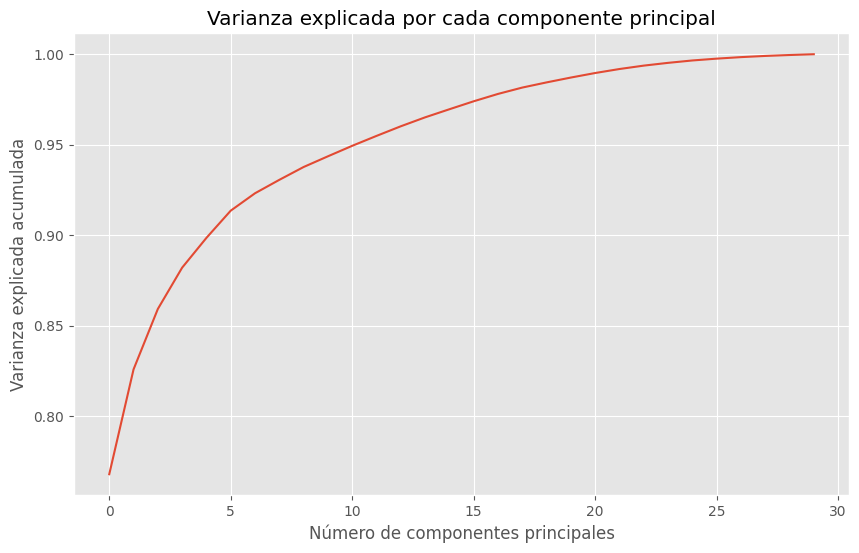

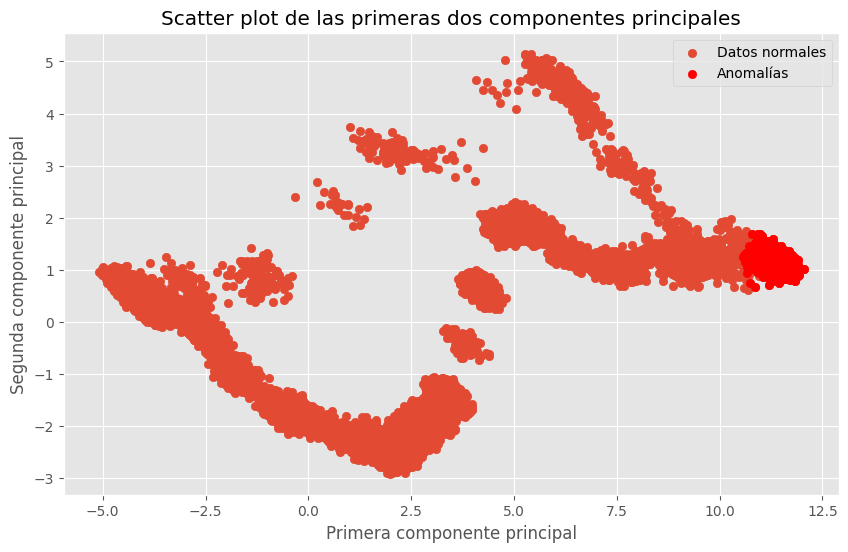

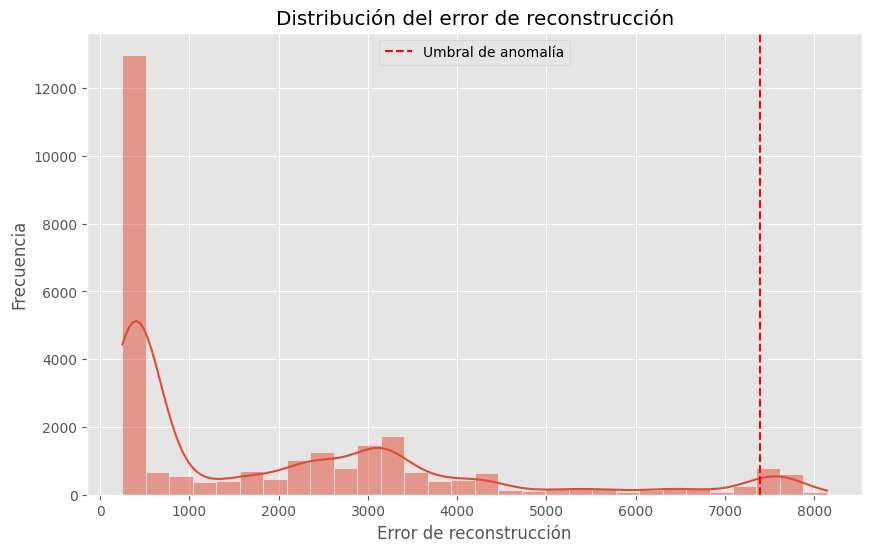

In [20]:
# Gráfica 1: Varianza explicada por cada componente principal
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(modelo_pca.explained_variance_ratio_))
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada por cada componente principal')
plt.grid(True)
plt.show()

# Gráfica 2: Scatter plot de las primeras dos componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], label='Datos normales')
plt.scatter(df_pca[reconstruction_error > threshold, 0], df_pca[reconstruction_error > threshold, 1], 
            color='red', label='Anomalías')
plt.xlabel('Primera componente principal')
plt.ylabel('Segunda componente principal')
plt.title('Scatter plot de las primeras dos componentes principales')
plt.legend()
plt.grid(True)
plt.show()

# Gráfica 3: Histograma del error de reconstrucción
plt.figure(figsize=(10, 6))
sns.histplot(reconstruction_error, bins=30, kde=True)
plt.axvline(threshold, color='red', linestyle='--', label='Umbral de anomalía')
plt.xlabel('Error de reconstrucción')
plt.ylabel('Frecuencia')
plt.title('Distribución del error de reconstrucción')
plt.legend()
plt.show()

In [103]:
pca_pipe = make_pipeline(PCA())
pca_pipe.fit(df)
df_pca = pca_pipe.fit_transform(df)

pca_model = pca_pipe.named_steps['pca']
# Valores propios
eigenvalues = pca_model.explained_variance_

# Vectores propios
eigenvectors = pca_model.components_

In [104]:
def calculate_IR_p(p, df, eigenvalues, eigenvectors):
    # Extraer el registro específico p
    x_p = df.iloc[p].values
    
    # Número de componentes principales
    q = len(eigenvalues)
    
    # Número de variables originales
    n = df.shape[1]
    
    # Calcular el numerador
    numerator = 0
    for i in range(q):
        sum_term = 0
        for j in range(n):
            sum_term += (eigenvectors[i, j] ** 2) * x_p[j]
        numerator += eigenvalues[i] * sum_term
    
    # Calcular el denominador
    denominator = np.sum(eigenvalues)
    
    # Calcular IR_p
    IR_p = numerator / denominator
    return IR_p


In [105]:
df['IR_p'] = df.apply(lambda row: calculate_IR_p(row.name, df, eigenvalues, eigenvectors), axis=1)

In [106]:
df["IR_p"]

0        88.459805
1        90.581522
2        91.896645
3        91.505479
4        89.268118
           ...    
27746    15.837888
27747    16.426511
27748    15.090678
27749    15.238221
27750    14.417139
Name: IR_p, Length: 27751, dtype: float64

In [107]:
# Filtrar los registros donde IR_p es mayor que 0.8
anomalies = df[df['IR_p'] > 80]

# Mostrar las anomalías
print(anomalies)

       SegmentR  PEPR  AgeR  TimeRelationR  IncomeSourceR  ActivityR  \
0            80   100    96            100            100         97   
1            96    96    97             98             99         96   
2            81    98    99             99             99         98   
3            96    99    99            100             96         99   
4            82    99    98             98             97        100   
...         ...   ...   ...            ...            ...        ...   
26938        96    99    98             98             97         96   
26939        98    96   103             99            100         97   
26955        80   100   100             97             96         96   
26972        97    97   100             97            100         97   
26979        81    98   100            100             96        100   

       NationalityR  CommonAddR  ProductTR  SubproductR  ...  RSR  AAR  \
0                96          72         98           77  ... 

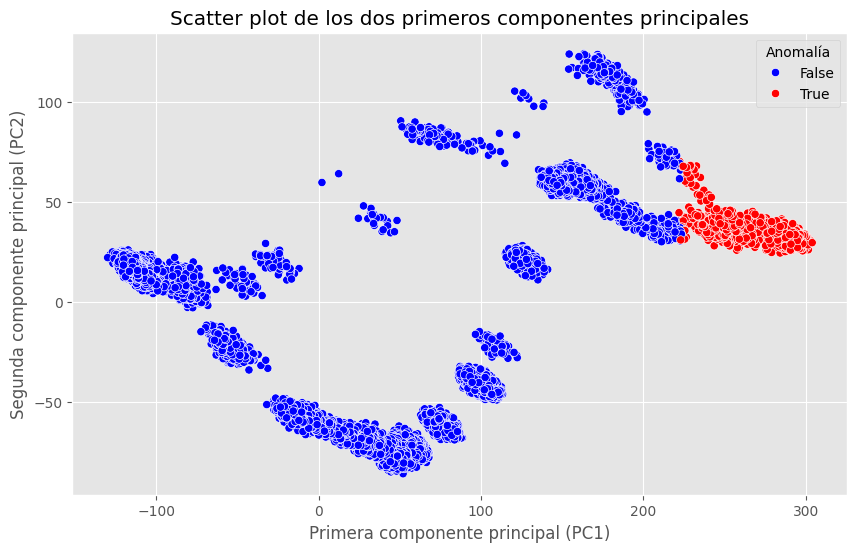

In [108]:
# Crear un DataFrame con los componentes principales
pc_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(31)])

# Añadir la columna 'IR_p' al DataFrame de componentes principales
pc_df['IR_p'] = df['IR_p']

# Añadir una columna para indicar si el registro es una anomalía
pc_df['Anomaly'] = pc_df['IR_p'] > 80

# Graficar los dos primeros componentes principales, señalando las anomalías
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Anomaly', palette={True: 'red', False: 'blue'}, data=pc_df)
plt.title('Scatter plot de los dos primeros componentes principales')
plt.xlabel('Primera componente principal (PC1)')
plt.ylabel('Segunda componente principal (PC2)')
plt.legend(title='Anomalía')
plt.grid(True)
plt.show()

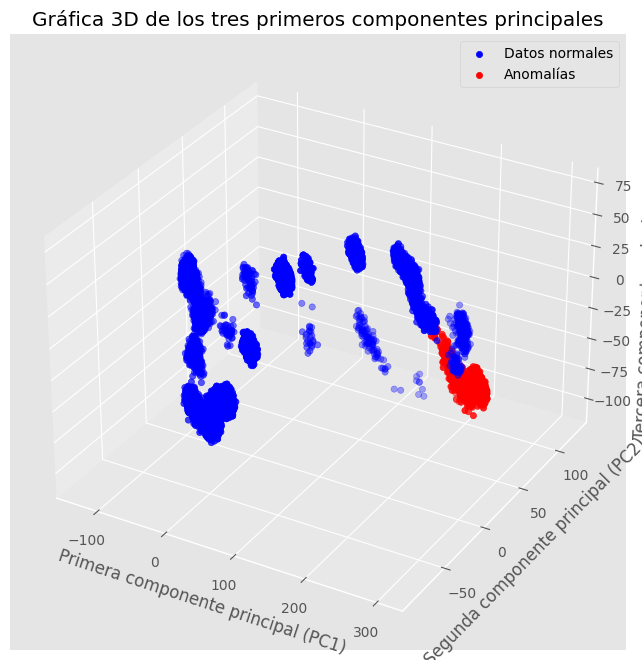

In [109]:
# Graficar los tres primeros componentes principales en 3D, señalando las anomalías
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos normales
ax.scatter(pc_df.loc[~pc_df['Anomaly'], 'PC1'], pc_df.loc[~pc_df['Anomaly'], 'PC2'], pc_df.loc[~pc_df['Anomaly'], 'PC3'], 
           color='blue', label='Datos normales')

# Graficar los puntos anómalos
ax.scatter(pc_df.loc[pc_df['Anomaly'], 'PC1'], pc_df.loc[pc_df['Anomaly'], 'PC2'], pc_df.loc[pc_df['Anomaly'], 'PC3'], 
           color='red', label='Anomalías')

# Configuración de etiquetas y título
ax.set_xlabel('Primera componente principal (PC1)')
ax.set_ylabel('Segunda componente principal (PC2)')
ax.set_zlabel('Tercera componente principal (PC3)')
ax.set_title('Gráfica 3D de los tres primeros componentes principales')
ax.legend()
plt.show()

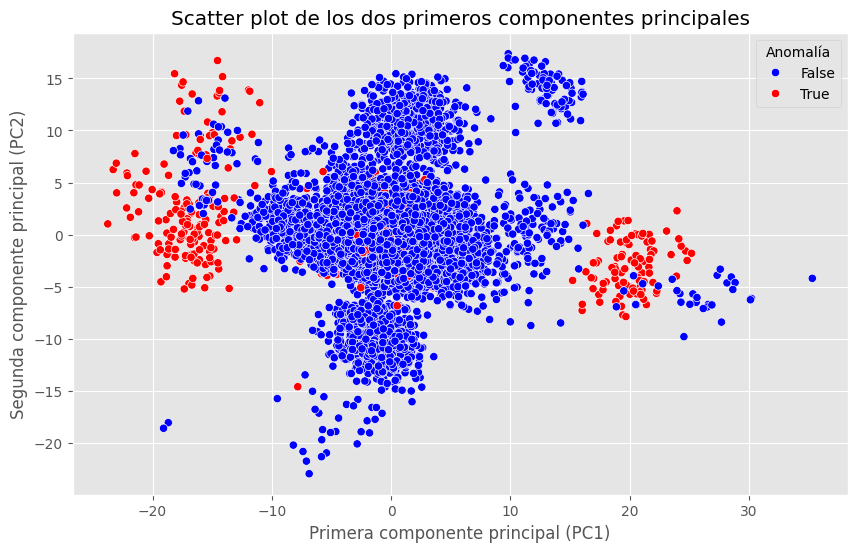

In [110]:
# Graficar los dos primeros componentes principales, señalando las anomalías
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC29', y='PC30', hue='Anomaly', palette={True: 'red', False: 'blue'}, data=pc_df)
plt.title('Scatter plot de los dos primeros componentes principales')
plt.xlabel('Primera componente principal (PC1)')
plt.ylabel('Segunda componente principal (PC2)')
plt.legend(title='Anomalía')
plt.grid(True)
plt.show()

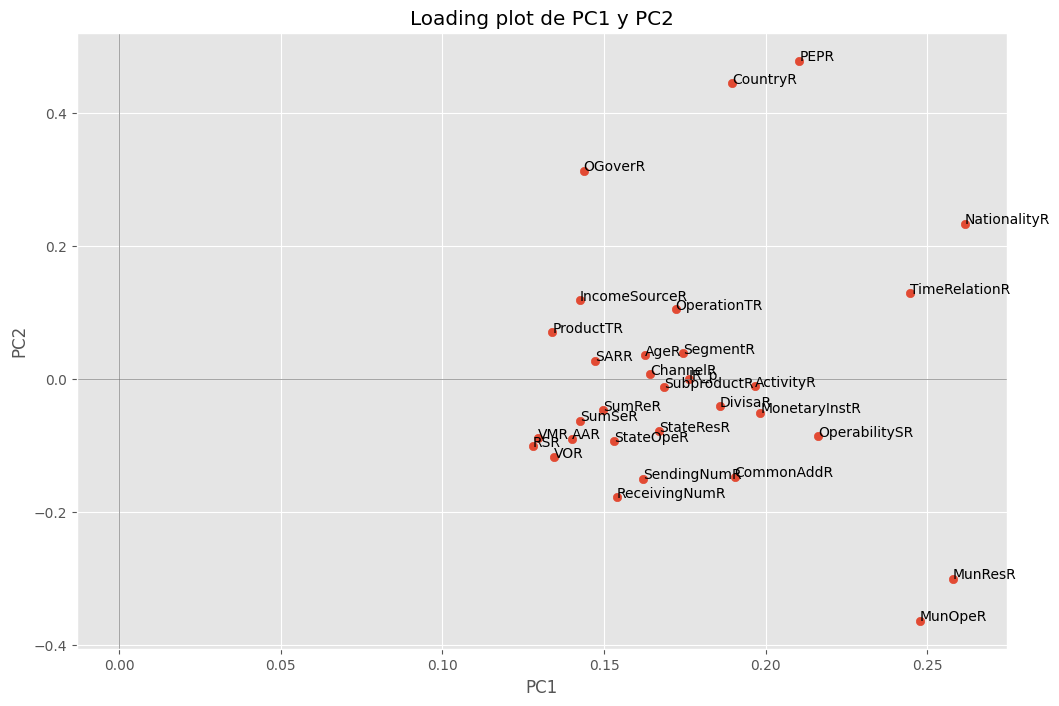

In [111]:
# Obtener los vectores propios (cargas)
loadings = pca_model.components_

# Crear un DataFrame para las cargas
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=df.columns)

# Gráfica de las cargas de cada variable en PC1 y PC2
plt.figure(figsize=(12, 8))
plt.scatter(loadings_df['PC1'], loadings_df['PC2'])

# Añadir etiquetas para cada punto
for i in loadings_df.index:
    plt.text(loadings_df.loc[i, 'PC1'], loadings_df.loc[i, 'PC2'], i)

# Configuración de la gráfica
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loading plot de PC1 y PC2')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid(True)
plt.show()


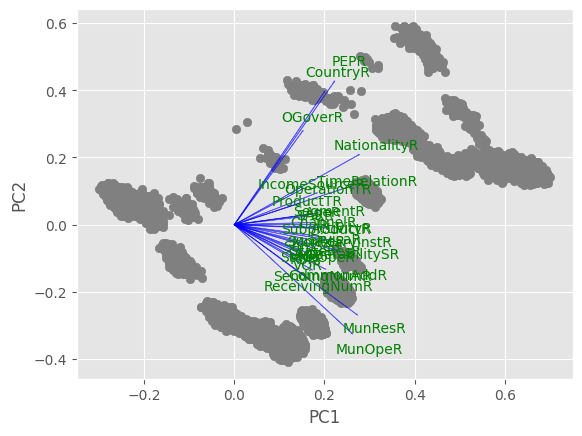

In [112]:
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    fig, ax = plt.subplots()
    
    # Dibujar los puntos
    ax.scatter(xs * scalex, ys * scaley, c = 'gray')
    
    # Dibujar los vectores
    for i in range(len(coeff)):
        x_arrow = coeff[i,0] * max(xs) * scalex * 1.5  # Escalar los vectores para visualización
        y_arrow = coeff[i,1] * max(ys) * scaley * 1.5
        ax.arrow(0, 0, x_arrow, y_arrow, color='b', alpha=0.5)
        if labels is not None:
            ax.text(x_arrow * 1.15, y_arrow * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

# Nombre de las variables para los vectores
labels = df.columns

# Coeficientes de las variables en las componentes principales
coeff = pca_model.components_.T

# Dibujar el biplot
biplot(df_pca, coeff, labels)


In [113]:
pc_df.to_csv("PCs.csv", index=False)

In [114]:
# Obtener las cargas de las componentes principales
loadings = pca_model.components_.T

In [142]:
# Valores propios o varianza explicada por cada componente
explained_variance = pca_model.explained_variance_

# Calcular la importancia de las variables como la suma de las contribuciones a la varianza explicada
variance_contributions = (loadings ** 2) * explained_variance
total_importance = np.sum(variance_contributions, axis=1)

# Crear un DataFrame para la visualización
features = df.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': total_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Gráfico de la importancia de las variables
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.xlabel('Importancia (contribución a la varianza explicada)')
plt.ylabel('Variable')
plt.title('Importancia de las Variables según PCA')
plt.gca().invert_yaxis()
plt.show()

ValueError: operands could not be broadcast together with shapes (31,2) (31,) 

In [141]:
importance_df.to_csv("Importancia.csv", index=False)

In [197]:
def graficar_imp(df, n_components=30):
    # Aplicar PCA manteniendo solo las primeras dos componentes principales
    pca = PCA(n_components=n_components)
    pca.fit(df)

    # Loadings o vectores propios de las primeras dos componentes
    loadings = pca.components_.T

    # Valores propios o varianza explicada por PC1 y PC2
    explained_variance = pca.explained_variance_

    # Calcular la importancia de las variables como la suma de las contribuciones a la varianza explicada para PC1 y PC2
    variance_contributions = (loadings ** 2) * explained_variance
    total_importance = np.sum(variance_contributions, axis=1)

    # Crear un DataFrame para la visualización
    features = df.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': total_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Gráfico de la importancia de las variables
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
    plt.xlabel('Importancia (contribución a la varianza explicada)')
    plt.ylabel('Variable')
    plt.title('Importancia de las Variables según PCA')
    plt.gca().invert_yaxis()
    plt.show()
    return importance_df

In [199]:
def graficar_imp(df, n_components=30):
    # Aplicar PCA manteniendo solo las primeras dos componentes principales
    pca = PCA(n_components=n_components)
    pca.fit(df)

    # Loadings o vectores propios de las primeras dos componentes
    loadings = pca.components_[[28,29]].T

    # Valores propios o varianza explicada por PC1 y PC2
    explained_variance = pca.explained_variance_[[28,29]]

    # Calcular la importancia de las variables como la suma de las contribuciones a la varianza explicada para PC1 y PC2
    variance_contributions = (loadings ** 2) * explained_variance
    total_importance = np.sum(variance_contributions, axis=1)

    # Crear un DataFrame para la visualización
    features = df.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': total_importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Gráfico de la importancia de las variables
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightblue')
    plt.xlabel('Importancia (contribución a la varianza explicada)')
    plt.ylabel('Variable')
    plt.title('Importancia de las Variables según PCA')
    plt.gca().invert_yaxis()
    plt.show()
    return importance_df

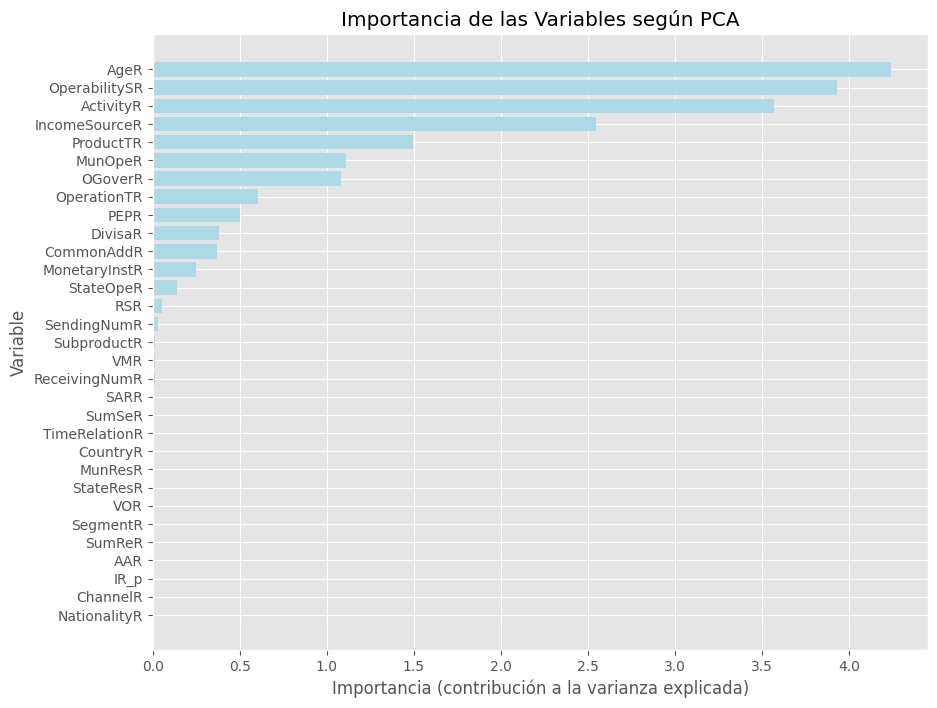

In [200]:
importance_df = graficar_imp(df, 30)
importance_df.to_csv("Importancia2829.csv", index=False)

In [150]:
anomalias = df[df["IR_p"] > 80]

In [175]:
anomalias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2360 entries, 0 to 26979
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SegmentR       2360 non-null   int64  
 1   PEPR           2360 non-null   int64  
 2   AgeR           2360 non-null   int64  
 3   TimeRelationR  2360 non-null   int64  
 4   IncomeSourceR  2360 non-null   int64  
 5   ActivityR      2360 non-null   int64  
 6   NationalityR   2360 non-null   int64  
 7   CommonAddR     2360 non-null   int64  
 8   ProductTR      2360 non-null   int64  
 9   SubproductR    2360 non-null   int64  
 10  OperationTR    2360 non-null   int64  
 11  MonetaryInstR  2360 non-null   int64  
 12  DivisaR        2360 non-null   int64  
 13  ChannelR       2360 non-null   int64  
 14  OperabilitySR  2360 non-null   int64  
 15  OGoverR        2360 non-null   int64  
 16  SARR           2360 non-null   int64  
 17  VMR            2360 non-null   int64  
 18  VOR         

In [188]:
anomalias["OGoverR"].min()

68

In [190]:
datos_generales = pd.DataFrame(index=anomalias.index)
datos_generales['SegmentR'] = np.where(anomalias['SegmentR'] < 91, 'Banca Estatal', 'Banca Federal')
datos_generales["PEPR"] = "Políticamente expuesta"
datos_generales['AgeR'] = np.where(anomalias['AgeR'] < 83, '18 años o más y menores de 65', '65 años o más o No Identificado')
datos_generales["TimeRelationR"] = "Relacion comercial menor a 1 año"
datos_generales['IncomeSourceR'] = np.where(anomalias['IncomeSourceR'] < 76, 'Comisiones', 'Venta de Bienes')
datos_generales["ActivityR"] = "Alta"
datos_generales["NationalityR"] = "Extranjero"
datos_generales['CommonAddR'] = np.where(anomalias['CommonAddR'] < 70, 'Sin Domicilios Comunes Con Otras Personas', 'Con Domicilios comunes Con Otras personas')
datos_generales['ProductTR'] = np.where(anomalias['ProductTR'] < 75, 'Crédito', 'Cobranza')
datos_generales['SubproductR'] = np.where(anomalias['SubproductR'] < 37, 'Inversión',
                                      np.where(anomalias['SubproductR'] < 63, 'Nómina sin chequera', np.where(anomalias['SubproductR'] < 87, 'Cuenta preferente', 'Pagaré Caimán')))
datos_generales['OperationTR'] = np.where(anomalias['OperationTR'] < 62, 'Pago tarjeta de crédito', 'Depósito efectivo')
datos_generales['MonetaryInstR'] = "Efectivo"
datos_generales['DivisaR'] = np.where(anomalias['DivisaR'] < 91, 'EURO', 'RUBLO')
datos_generales['ChannelR'] = np.where(anomalias['ChannelR'] < 85, 'Cajero', 'Sucursal')
datos_generales['OperabilitySR'] = np.where(anomalias['OperabilitySR'] < 60, 'Nivel 3',
                                      np.where(anomalias['OperabilitySR'] < 80, 'Nivel 4', 'Nivel 5'))
datos_generales['MunOpeR'] = np.where(anomalias['MunOpeR'] < 94, 'Nivel 2', 'Nivel 3')
datos_generales["MunResR"] = "Alto"

In [192]:
datos_generales.to_csv("Anomalias.csv")